In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('kc_house_data.csv')

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [25]:
pd.set_option("display.max_columns",None)

In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
df.drop(['id'], axis = 1, inplace = True)

In [28]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [29]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [30]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int64
month                     int64
day                       int64
dtype: object

In [31]:
df.drop(['date'], axis = 1, inplace = True)

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [33]:
for column in df.columns:
    print(column, df[column].unique())

price [ 221900.  538000.  180000. ...  610685. 1007500.  402101.]
bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
sqft_living [1180 2570  770 ... 3087 3118 1425]
sqft_lot [ 5650  7242 10000 ...  5813  2388  1076]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above [1180. 2170.  770. 1050. 1680. 3890. 1715. 1060. 1890.   nan  860. 1430.
 1370. 1810. 1980. 1200. 1250. 2330. 2270. 1070. 2450. 1710. 1750. 1400.
  790. 2570. 2320. 1190. 1510. 1090. 1280.  930. 2360.  890. 2620. 2600.
 3595. 1570.  920. 3160.  990. 2290. 2165. 1640. 1000. 2130. 2830. 2250.
 2420. 3250. 1850. 1590. 1260. 2519. 1540. 1110. 1770. 2720. 2240. 1600.
 3070. 2380. 2390.  880. 1040.  910. 3450. 2350. 1900. 1010.  960. 2660.
 1610.  765. 3520. 1290. 1960. 1160. 12

In [34]:
X = df.drop(['price'], axis = 1)
Y = df[['price']]

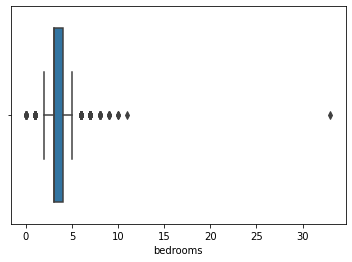

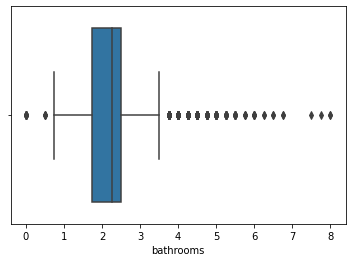

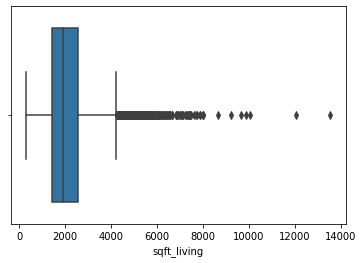

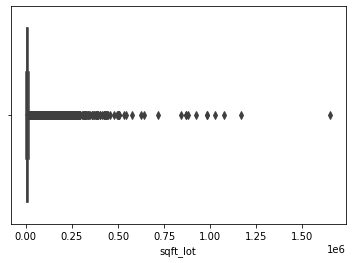

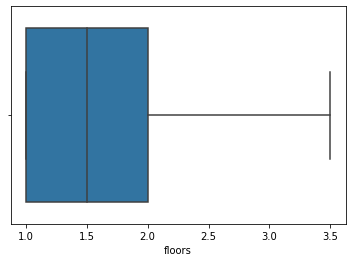

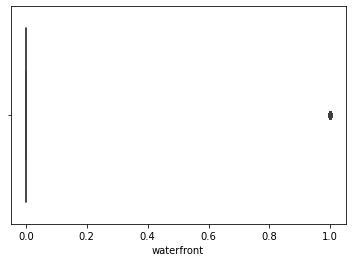

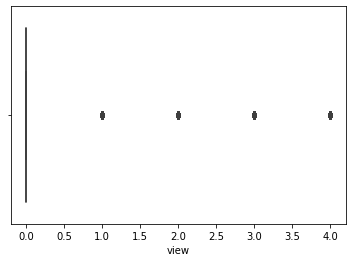

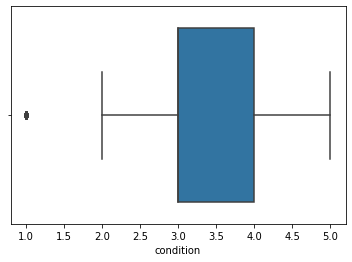

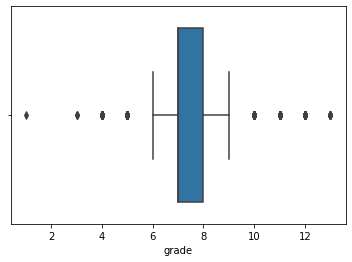

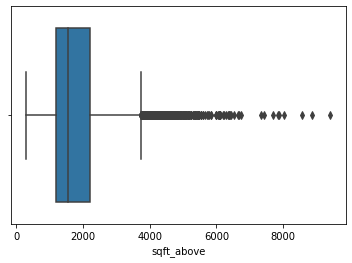

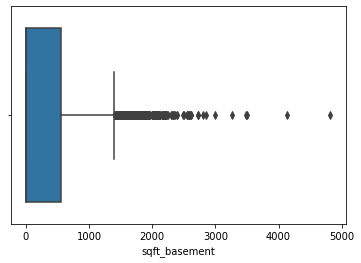

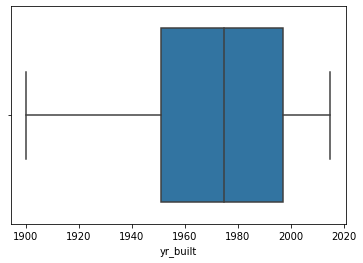

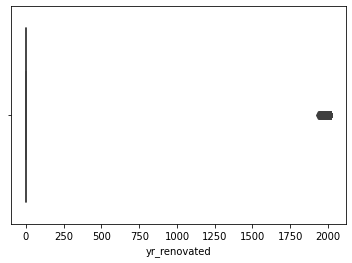

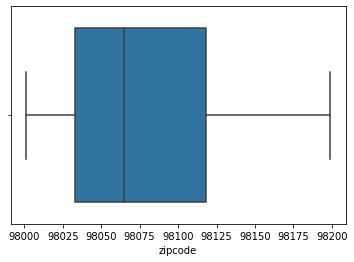

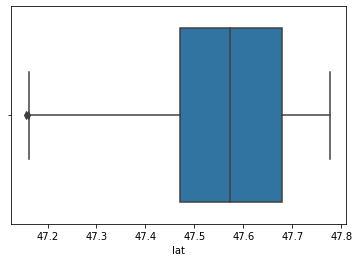

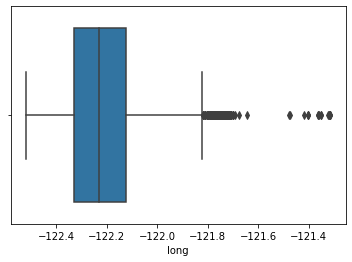

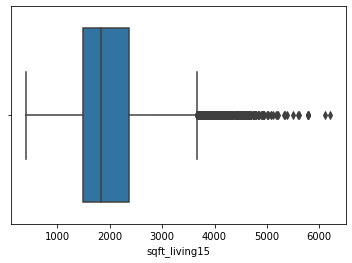

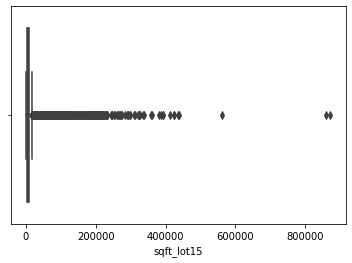

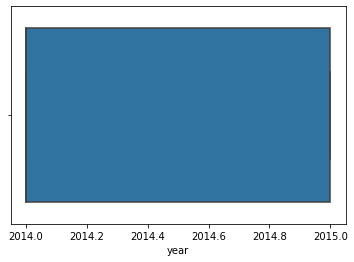

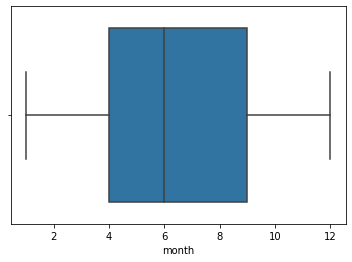

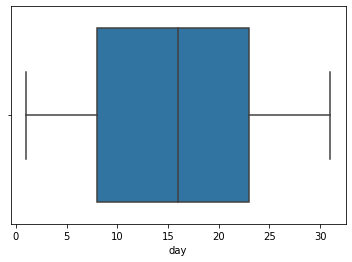

In [35]:
for column in X.columns:
    plt.figure()
    sns.boxplot(df[column])

In [36]:
for column in X.columns:
    q1 = X[column].quantile(0.25)
    q3 = X[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    X[column] = np.where(X[column]>upper, upper, X[column])
    X[column] = np.where(X[column]<lower, lower, X[column])

In [37]:
X.isnull().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

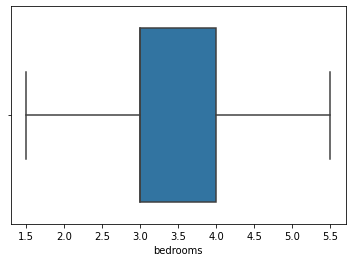

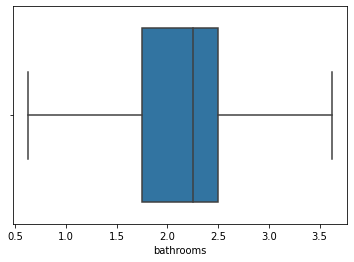

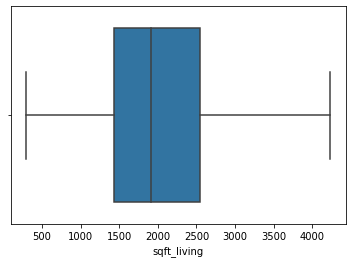

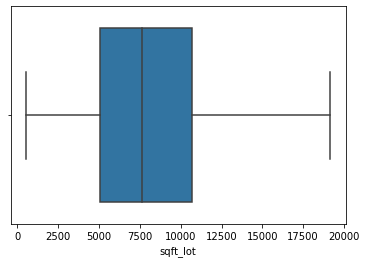

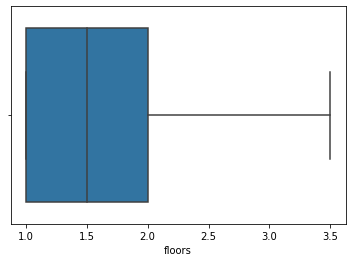

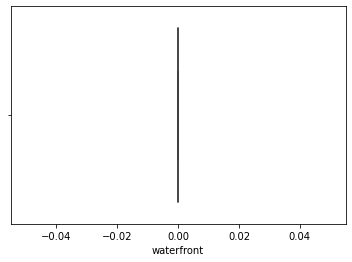

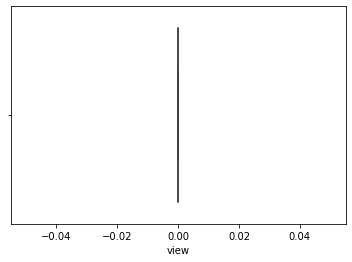

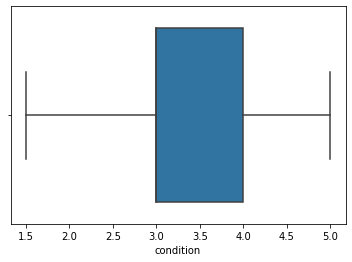

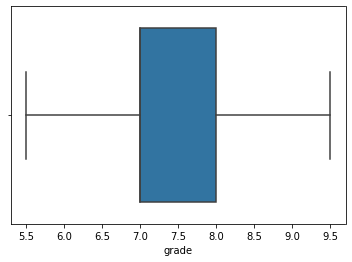

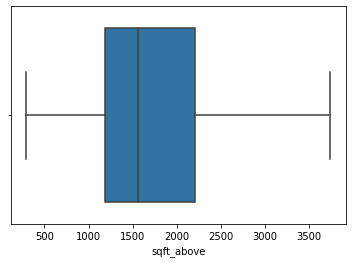

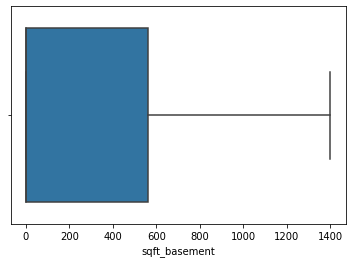

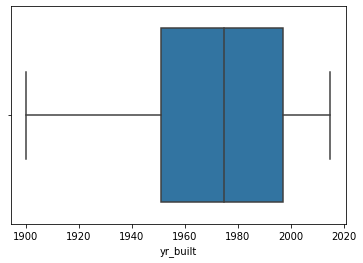

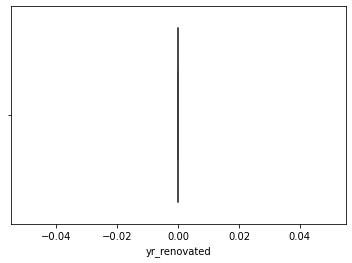

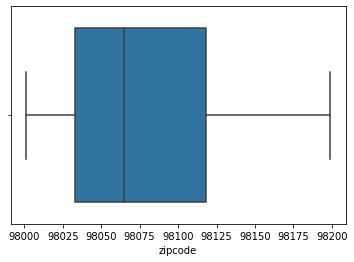

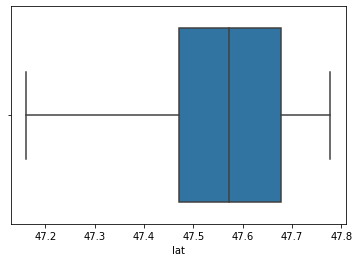

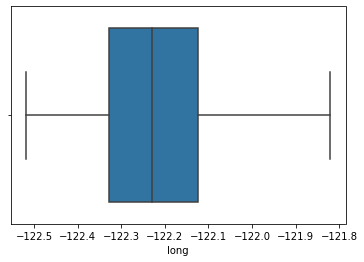

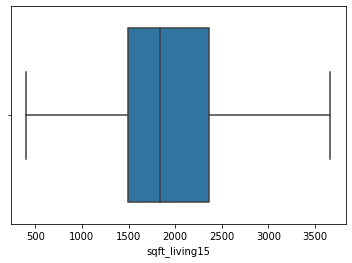

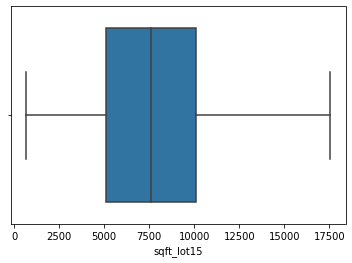

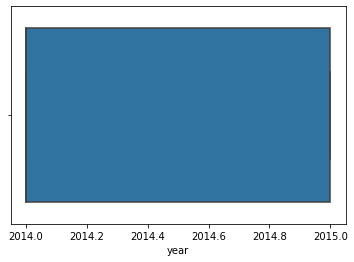

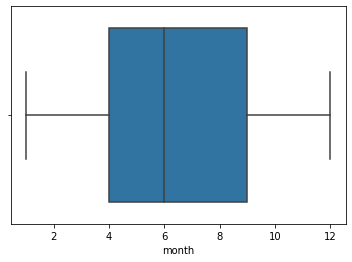

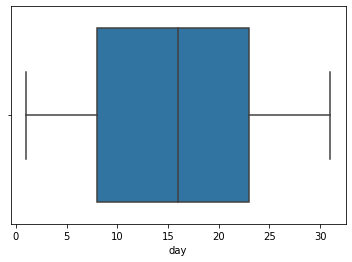

In [39]:
for column in X.columns:
    plt.figure()
    sns.boxplot(X[column])

In [46]:
X['sqft_above'].fillna(X['sqft_above'].median(), inplace = True)

In [47]:
num = pd.DataFrame()
char = pd.DataFrame()
for column in X.columns:
    if X[column].value_counts().count() < 20:
        char.insert(0, column, X[column])
    else:
        num.insert(0, column, X[column])

In [48]:
char.head()

,month,year,yr_renovated,grade,condition,view,waterfront,floors,bathrooms,bedrooms
0,10.0,2014.0,0.0,7.0,3.0,0.0,0.0,1.0,1.00,3.0
1,12.0,2014.0,0.0,7.0,3.0,0.0,0.0,2.0,2.25,3.0
2,2.0,2015.0,0.0,6.0,3.0,0.0,0.0,1.0,1.00,2.0
3,12.0,2014.0,0.0,7.0,5.0,0.0,0.0,1.0,3.00,4.0
4,2.0,2015.0,0.0,8.0,3.0,0.0,0.0,1.0,2.00,3.0


In [49]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbins.fit_transform(num), columns = num.columns)
num_binned.head()

,day,sqft_lot15,sqft_living15,long,lat,zipcode,yr_built,sqft_basement,sqft_above,sqft_lot,sqft_living
0,4.0,3.0,1.0,4.0,3.0,9.0,2.0,0.0,2.0,3.0,1.0
1,2.0,5.0,4.0,2.0,8.0,8.0,2.0,0.0,7.0,4.0,7.0
2,8.0,5.0,8.0,4.0,9.0,2.0,1.0,0.0,0.0,7.0,0.0
3,2.0,2.0,1.0,0.0,3.0,8.0,4.0,2.0,1.0,2.0,5.0
4,5.0,4.0,4.0,8.0,5.0,5.0,6.0,0.0,5.0,5.0,3.0


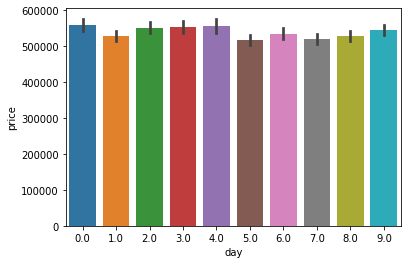

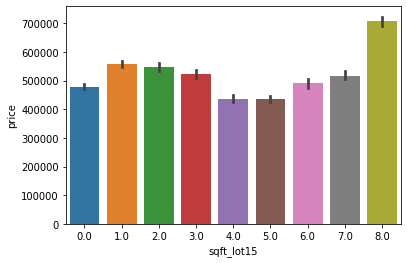

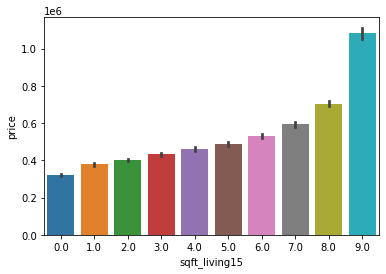

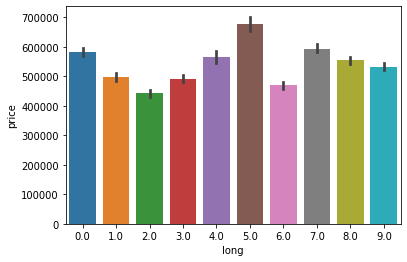

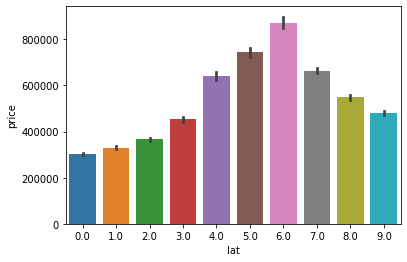

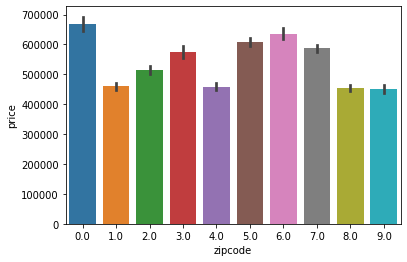

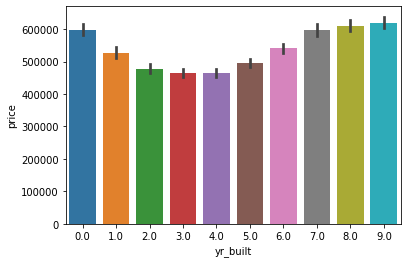

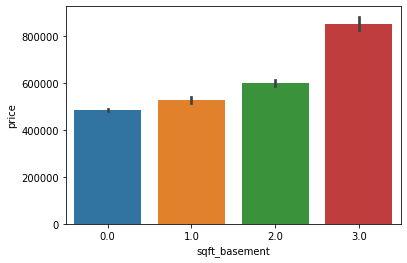

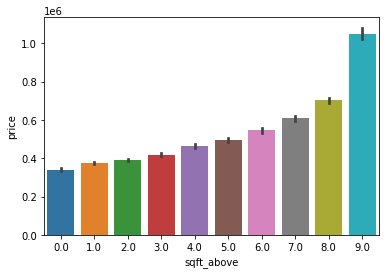

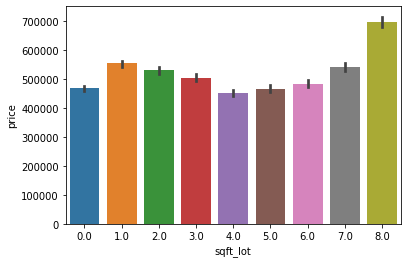

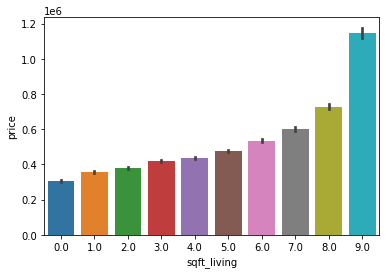

In [50]:
X_num_binned = pd.concat([num_binned,Y], axis = 1)
for column in num_binned.columns:
    plt.figure()
    sns.barplot(x = column, y = "price", data = X_num_binned)

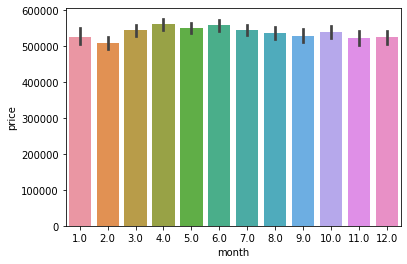

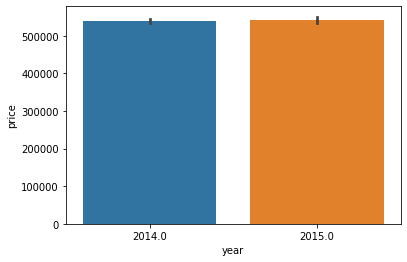

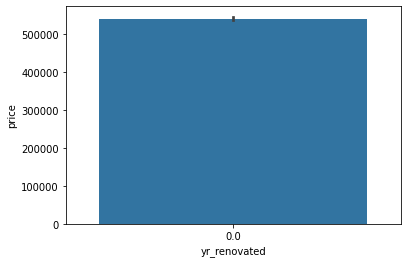

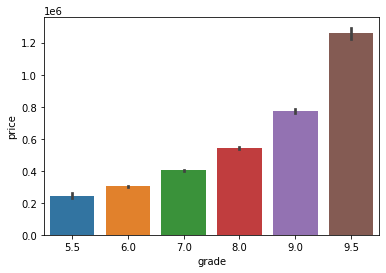

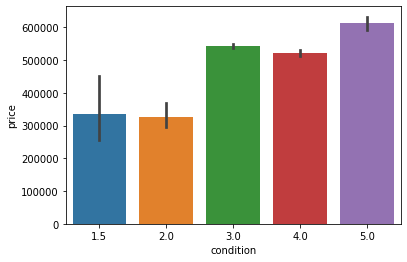

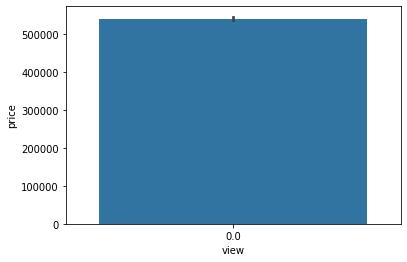

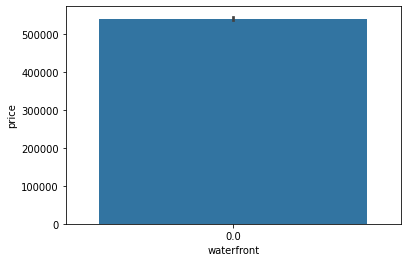

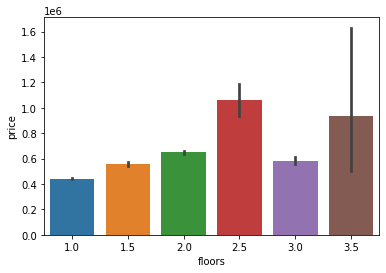

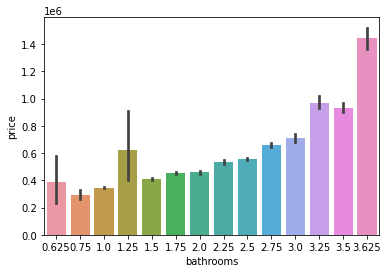

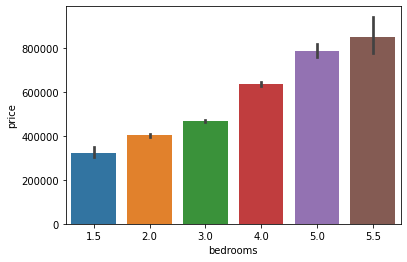

In [51]:
X_char = pd.concat([char,Y], axis = 1)
for column in char.columns:
    plt.figure()
    sns.barplot(x = column, y = "price", data = X_char)

In [57]:
# num.drop(['day'], axis = 1, inplace = True)
char.drop(['waterfront','view','yr_renovated','year','month'],axis = 1, inplace = True)

In [58]:
X_new = pd.concat([num,char], axis = 1)

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X_new), columns = X_new.columns)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.3, random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_prediction_lin_reg = lin_reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_prediction_lin_reg)

0.5904838430471844

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,Y_train)
Y_prediction_rfr = rfr.predict(X_test)
r2_score(Y_test,Y_prediction_rfr)

0.816150073775604